# Visualisation of quantum circuits
geqo provides two frameworks for plotting  quantum circuit diagrams: LaTeX and Matplotlib. At a basic level, diagrams can be generated using the ```plot_latex``` and ```plot_mpl``` functions given a ```Sequence```. For advanced use cases, custom styling and parameterized circuits are supported through additional configurable arguments.

## Circuit visualization with LaTeX

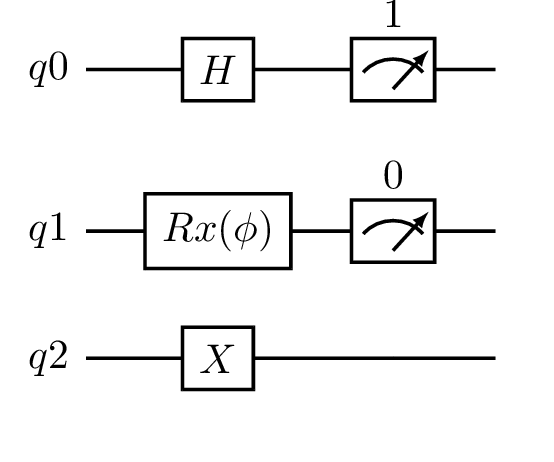

In [1]:
from geqo.visualization import plot_latex
from geqo.core import Sequence
from geqo.gates import Hadamard, PauliX, Rx
from geqo.simulators import ensembleSimulatorSymPy
from geqo.operations import Measure

sim = ensembleSimulatorSymPy(2, 3)

seq = Sequence(
    ["c0", "c1"],
    ["q0", "q1", "q2"],
    [
        (Hadamard(), ["q0"]),
        (PauliX(), ["q2"]),
        (Rx("phi"), ["q1"]),
        (Measure(2), ["q0", "q1"], ["c1", "c0"]),
    ],
)

plot_latex(seq, backend=sim, greek_symbol=True)

The corresponding LaTeX code can be obtained with the function ```tolatex```.

In [2]:
from geqo.visualization import tolatex
from geqo.core import Sequence
from geqo.gates import Hadamard, PauliX, Rx
from geqo.simulators import ensembleSimulatorSymPy

sim = ensembleSimulatorSymPy(2, 3)

seq = Sequence(
    ["c0", "c1"],
    ["q0", "q1", "q2"],
    [
        (Hadamard(), ["q0"]),
        (PauliX(), ["q2"]),
        (Rx("phi"), ["q1"]),
        (Measure(2), ["q0", "q1"], ["c1", "c0"]),
    ],
)

latex_code = tolatex(seq, backend=sim, fold=8, greek_symbol=True)
print(latex_code)

\begin{quantikz}[color=black,background color=white]
\lstick{$q0$}&\gate[style={draw=black,fill=white!20},label style=black]{H}&\meter[style={draw=black,fill=white!20}]{1}&\qw & \\
\lstick{$q1$}&\gate[style={draw=black,fill=white!20},label style=black]{Rx(\phi)}&\meter[style={draw=black,fill=white!20}]{0}&\qw & \\
\lstick{$q2$}&\gate[style={draw=black,fill=white!20},label style=black]{X}&\qw &\qw & \\
\end{quantikz}


## Circuit Visualisation with Matplotlib

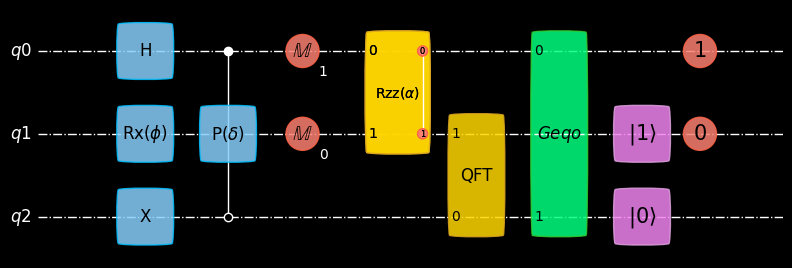

In [3]:
from geqo.visualization import plot_mpl
from geqo.core import Sequence, BasicGate
from geqo.gates import Hadamard, PauliX, Rx, Phase, Rzz
from geqo.operations.controls import QuantumControl, ClassicalControl
from geqo.algorithms import QFT
from geqo.initialization import SetQubits, SetBits
from geqo.simulators import ensembleSimulatorSymPy

sim = ensembleSimulatorSymPy(2, 3)

seq = Sequence(
    ["c0", "c1"],
    ["q0", "q1", "q2"],
    [
        (Hadamard(), ["q0"]),
        (PauliX(), ["q2"]),
        (Rx("phi"), ["q1"]),
        (QuantumControl([1, 0], Phase("delta")), [2, 0, 1]),
        (Measure(2), ["q0", "q1"], ["c1", "c0"]),
        (ClassicalControl([0, 1], Rzz("alpha")), ["c0", "c1", 0, 1]),
        (QFT(2), ["q2", 1]),
        (BasicGate("Geqo", 2), [0, 2]),
        (SetQubits("sq", 2), ["q2", "q1"]),
        (SetBits("sb", 2), [0, 1]),
    ],
)
sim.setValue("sq", [0, 1])
sim.setValue("sb", [1, 0])
plot_mpl(seq, backend=sim, style="geqo_dark", greek_symbol=True)
# φ

## Visualization of measurement results
geqo includes the function ```plot_hist``` for displaying measurement results of quantum circuits. When used with the ```%matplotlib widget``` magic command, the probability distribution of measured states becomes 
interactive, offering a clear and insightful statistical interface.

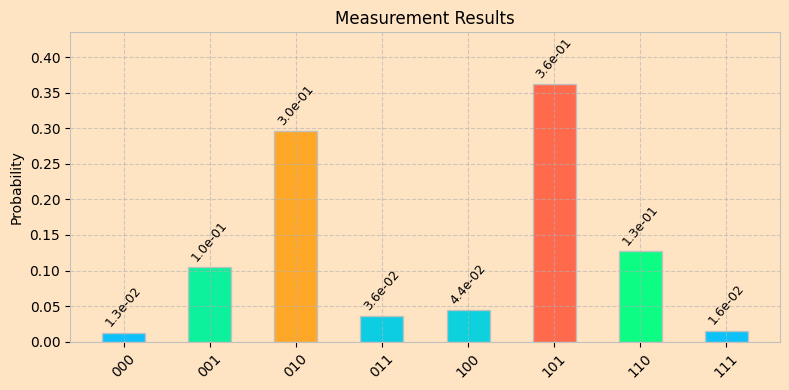

In [4]:
from geqo.gates import Hadamard, CNOT, Ry
from geqo.operations import Measure
from geqo.simulators import ensembleSimulatorSymPy
from geqo.visualization import plot_hist, plot_mpl

sim = ensembleSimulatorSymPy(3, 3)

angles = ["a", "b", "c"]
values = [0.1, 0.5, 0.9]
for angle, value in zip(angles, values):
    sim.setValue(angle, value)

for i in range(3):
    sim.apply(Hadamard(), [i])
    sim.apply(Ry(angles[i]), [i])
sim.apply(CNOT(), [0, 1])
sim.apply(CNOT(), [1, 2])
sim.apply(Measure(3), [*range(3)], [*range(3)])

plot_hist(sim.ensemble, show_bar_labels=True)